In [20]:
# Import Package atau import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Mengkoneksikan Colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
path = "/content/gdrive/MyDrive/Dataset/"

In [29]:
#df = pd.read_csv(path + 'retail_sales.csv')
#df =pd.read_excel(path + 'retail_sales.xlsx')
#df =pd.read_json(path + 'retail_sales.json')
df =pd.read_csv(path + 'retail_sales_update.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Female,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Clothing,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Female,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Female,52,Clothing,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [30]:
# Mengecek info data (tipe datanya, non nul count data, nama kolom, index column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [31]:
# Menampilkan statistik deskriptif
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [32]:
# Menampilkan jumlah nilai hilang untuk setiap kolom
#df.isnull().sum()
df.isna().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [33]:
rows_with_nan = df[df.isna().any(axis=1)]
rows_with_nan

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


In [36]:
# Membuat DataFrame baru
data = pd.DataFrame(df)
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Female,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Clothing,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Female,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Female,52,Clothing,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [35]:
# Simpan DataFrame ke CSV baru
df.to_csv('Retail_Sales_Update.csv', index=False)

In [37]:
!ls

drive  gdrive  Retail_Sales_Update.csv	sample_data


In [44]:
# Menghitung total penjualan per kategori produk
total_per_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
#.sort_values(ascending=True)

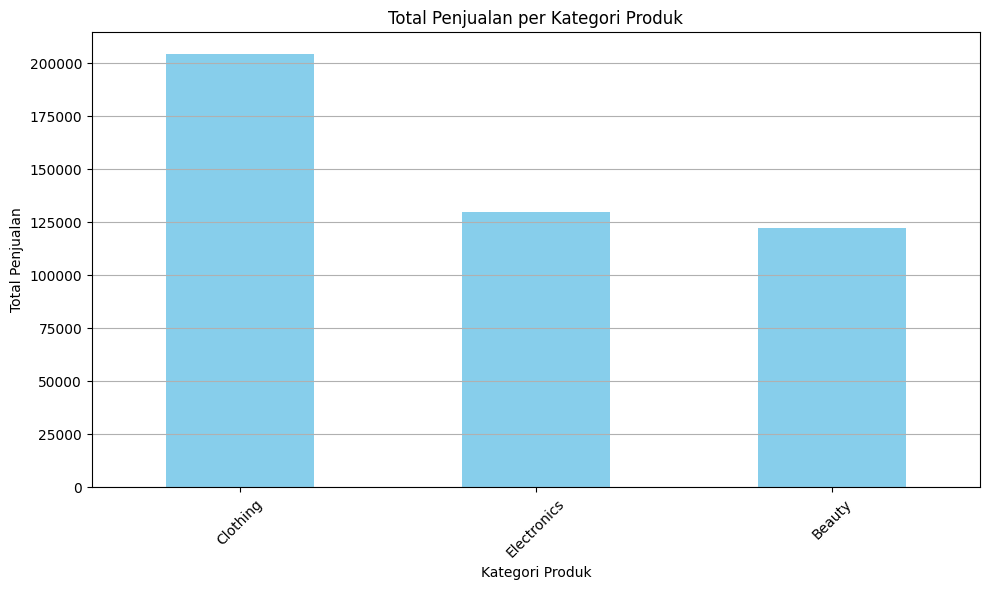

In [45]:
# Membuat grafik batang
plt.figure(figsize=(10, 6))
total_per_category.plot(kind='bar', color='skyblue')
plt.title('Total Penjualan per Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [46]:
# Menghitung jumlah pembeli berdasarkan gender
gender_distribution = df['Gender'].value_counts()

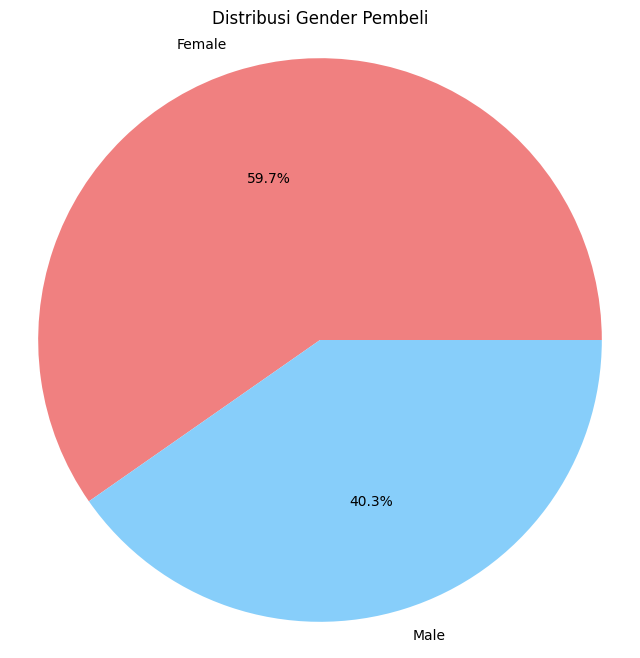

In [47]:
# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribusi Gender Pembeli')
plt.axis('equal') # Agar pie chart berbentuk lingaran (axis=1 kolom, axis=0 baris)

# Menampilkan pie chart
plt.show()

In [48]:
# Mengonversi kolom Date menjadi tanggal
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
# Menghitung total penjualan per tanggal
sales_trend = df.groupby('Date')['Total Amount'].sum()

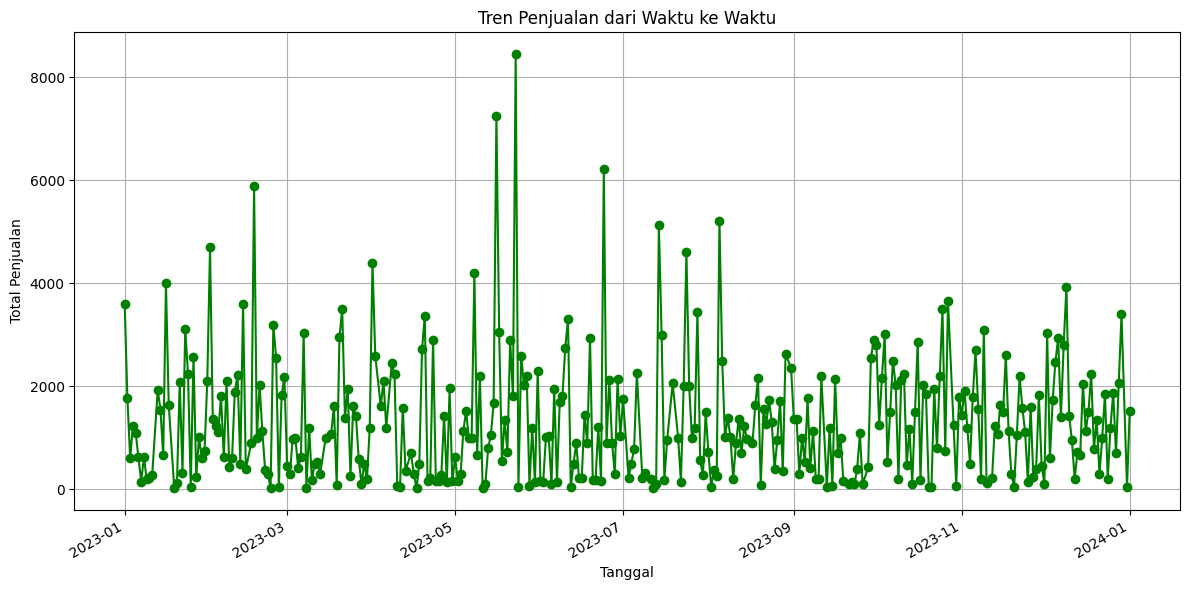

In [51]:
# Membuat grafik garis
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', color='green', marker='o')
plt.title('Tren Penjualan dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.grid()

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [54]:
# Mengambil tahun dan bulan dari kolom 'Date' dan menambahkannya sebagai kolom baru 'Month'
df['Month'] = df['Date'].dt.to_period('M')

In [55]:
# Mengelompokkan data berdasarkan 'Month' dan menjumlahkan 'Total Amount'
monthly_sales = df.groupby('Month')['Total Amount'].sum()

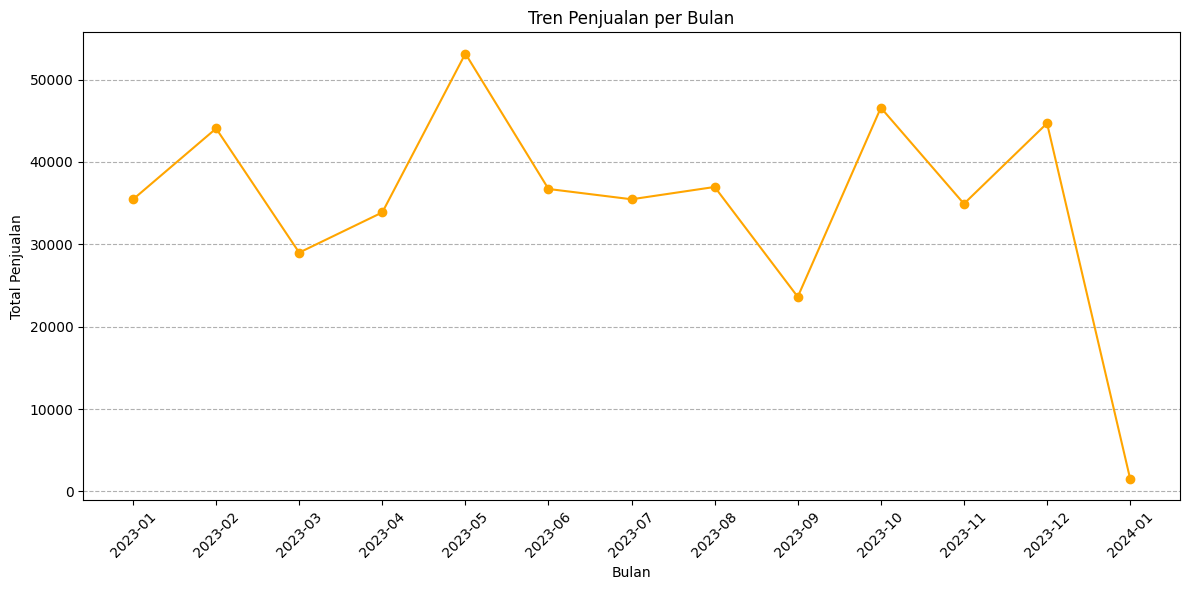

In [56]:
# Membuat line chart untuk menunjukkan tren penjualan per bulan
plt.figure(figsize=(12, 6))  # Mengatur ukuran figure
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-', color='orange')  # Membuat grafik garis
plt.title('Tren Penjualan per Bulan')  # Menambahkan judul
plt.xlabel('Bulan')  # Menambahkan label sumbu X
plt.ylabel('Total Penjualan')  # Menambahkan label sumbu Y
plt.xticks(rotation=45)  # Memutar label sumbu X agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--')  # Menambahkan garis bantu pada sumbu Y
plt.tight_layout()  # Mengatur layout agar tidak ada elemen yang terpotong
plt.show()  # Menampilkan grafik

In [57]:
# Mengfilter data untuk bulan Januari 2024
january_transactions = df[(df['Date'].dt.month == 1) & (df['Date'].dt.year == 2024)]

# Menampilkan hasil
print(january_transactions)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
210             211 2024-01-01     CUST211    Male   42           Beauty   
649             650 2024-01-01     CUST650  Female   55      Electronics   

     Quantity  Price per Unit  Total Amount    Month  
210         3             500          1500  2024-01  
649         1              30            30  2024-01  
